# Kari

Introduces the main ways of using Kari.

## Training

Import the neccecary modules

In [2]:
from dataset import Dataset
from utils_parameter_parsing import *
from sequence_processing_model import SequenceProcessingModel

Kari version: 0.1-dev


Load the parameters from the config file and create a model. Note that you can also overide any arguments in `config.ini` by passing them in a dictionary to `process_parameters`.

In [ ]:
config = config_parser('./config.ini') # parse config.ini
parameters = process_parameters(config, {}) # process_parameters expects a dictionary

Create a `SequenceProcessingModel` object. This object coordinates training/prediction/loading of models and datasets.

In [ ]:
sequence_processer = SequenceProcessingModel(**parameters)

We can then load the dataset (specified by the `dataset_text_folder` parameter). If pretrained token embeddings were specified with `token_pretrained_embedding_filepath`, these will be loaded also.

In [ ]:
sequence_processer.load_dataset()

Lastly, we specify the model we would like to use. Models are specified by the `model_name` parameter.

In [ ]:
sequence_processer.specify_model()

In [ ]:
sequence_processer.fit()

In [ ]:
np.count_nonzero((pred_idx == gold_idx)) / len(pred_idx)
# gold_idx[:18]

In [ ]:
sequence_processing_model.ds.tag_type_to_index

In [ ]:
neg_tag = sequence_processing_model.ds.tag_type_to_index['O']

In [ ]:
gold_labels = gold_idx != neg_tag
gold_labels[:18]

In [ ]:
pred_labels = pred_idx != neg_tag
pred_labels[:18]

In [ ]:
TP = 0
FP = 0
FN = 0

for pred, gold in zip(pred_labels, gold_labels):
    # FN
    if gold and not pred:
        FN += 1
    # FP
    if not gold and pred:
        FP += 1
    # TP
    if gold and pred:
        TP += 1
        
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = 2 * precision * recall / (precision + recall)
        
    

In [ ]:
TP, FP, FN

In [ ]:
precision, recall, f1

## Misc

In [1]:
from utils_parameter_parsing import *
from sequence_processing_model import SequenceProcessingModel

config = config_parser('./config.ini') # parse config.ini
parameters = process_parameters(config, {'model_name': 'MT-LSTM-CRF'}) # process_parameters expects a dictionary

sequence_processer = SequenceProcessingModel(**parameters)

Using TensorFlow backend.


Kari version: 0.1-dev


In [2]:
sequence_processer.load_dataset()

Loading (compound) dataset... Done (2.61 seconds)
Loading embeddings... Done (105.85 seconds)
Found 1891782 word vectors of dimension 200


In [3]:
sequence_processer.specify_model()

Building the multi-task LSTM-CRF model...WARNING:tensorflow:From /Users/johngiorgi/miniconda3/envs/kari/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:1247: calling reduce_sum (from tensorflow.python.ops.math_ops) with keep_dims is deprecated and will be removed in a future version.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 50, 200)           5650600   
____

In [4]:
sequence_processer.fit()

NameError: name 'kf' is not defined

## Visulize the model

We can easily create an image depicted our model. First, install the [graphviz graph library](http://www.graphviz.org/) and the [Python interface](https://pypi.python.org/pypi/graphviz).

> More info can be found [here](https://machinelearningmastery.com/visualize-deep-learning-neural-network-model-keras/).

In [7]:
# set this variable equal to your Keras model object.
model_ = sequence_processer.model.model[0]

We can either: create and save an image on our local machine,

In [8]:
from keras.utils import plot_model
plot_model(model_, to_file='model.png')

or, visulize it directly in the notebook

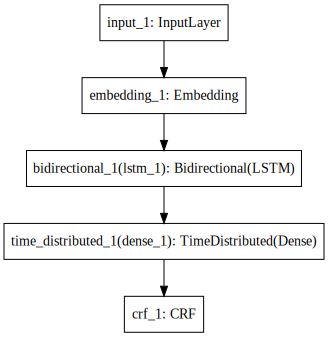

In [9]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model_).create(prog='dot', format='svg'))